# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [29]:
library(tidyverse)

library(ggpubr)
set.seed(111213)
options(repr.plot.width=5, repr.plot.height=5)

sim_data <- function(
  n = 100,
  X = rnorm(n=n),
  b0 = 5,
  b1 = .2,
  b2 = -.13,
  b3 = 1,
  err = rnorm(n=n)
){
  Y <- b0 + b1*X + b2*X^2 + b3*X^3 + err
  return(data.frame(X = X, Y = Y))
}

df <- sim_data()





b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [5]:
#install.packages("leaps")
library(leaps)

for(i in 2:10){
  df[paste0("X",i)] <- df$X^i
}

regfit.full <- regsubsets(Y~., df, nvmax = 10)
summary(regfit.full)

reg.summary = summary(regfit.full)
reg.summary

# See what is included in the summary object
attributes(reg.summary)

# You can directly query which terms are included at each level of complexity
reg.summary$which

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " "*" " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" "*" " " " " " " " " " "
4  ( 1 )  " " " " "*" " " " " "*" "*" " " "*" " "
5  ( 1 )  " " "*" "*" "*" "*" " " " " " " " " "*"
6  ( 1 )  " " "*" "*" "*" "*" "*" " " " " "*" " "
7  ( 1 )  " " " " "*" "*" " " "*" "*" "*" "*" "*"
8  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" " " "*"
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " "*" " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" "*" " " " " " " " " " "
4  ( 1 )  " " " " "*" " " " " "*" "*" " " "*" " "
5  ( 1 )  " " "*" "*" "*" "*" " " " " " " " " "*"
6  ( 1 )  " " "*" "*" "*" "*" "*" " " " " "*" " "
7  ( 1 )  " " " " "*" "*" " " "*" "*" "*" "*" "*"
8  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" " " "*"
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

,(Intercept),X,X2,X3,X4,X5,X6,X7,X8,X9,X10
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE
5,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
6,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE
7,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
8,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
9,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [6]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

[1] 0.9491937


[1] 5

(Intercept)          X2          X3          X4          X5         X10 
 4.64785564  0.45848459  1.29443580 -0.16917295 -0.05171014  0.00030043

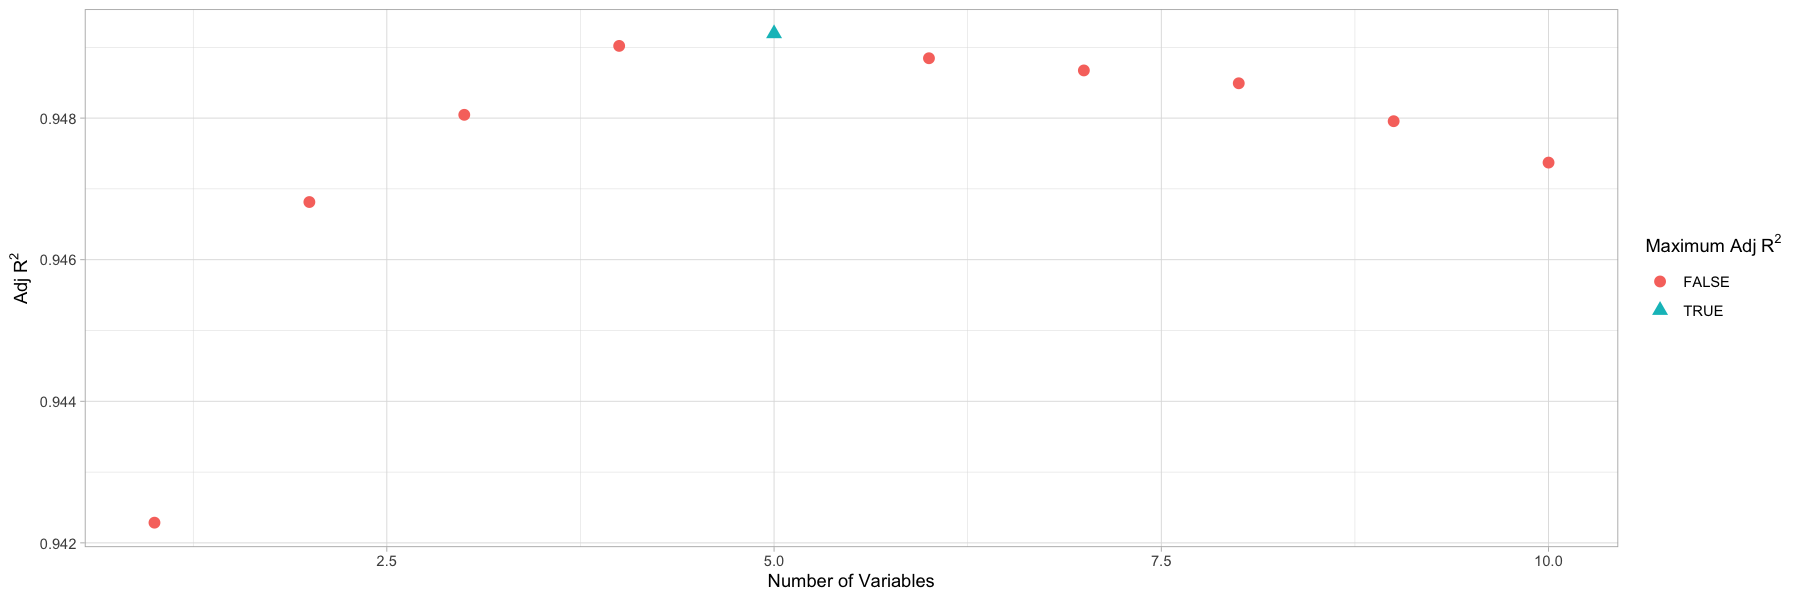

[1] 2.024479


[1] 4

(Intercept)           X3           X6           X7           X9 
 4.788520788  1.313563591 -0.007740474 -0.028245248  0.003282317

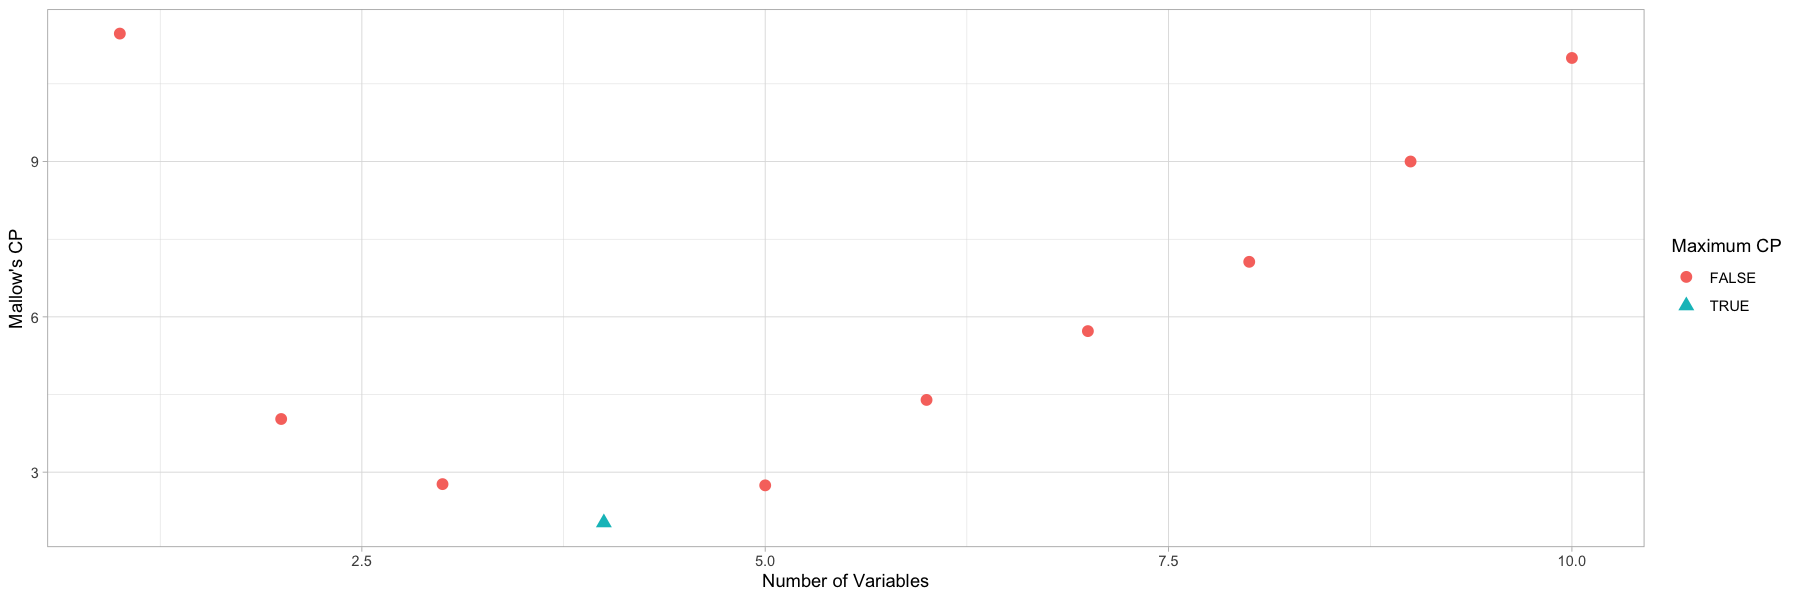

[1] -281.6221


[1] 2

(Intercept)          X3          X5 
 4.71862918  1.27606026 -0.04237361

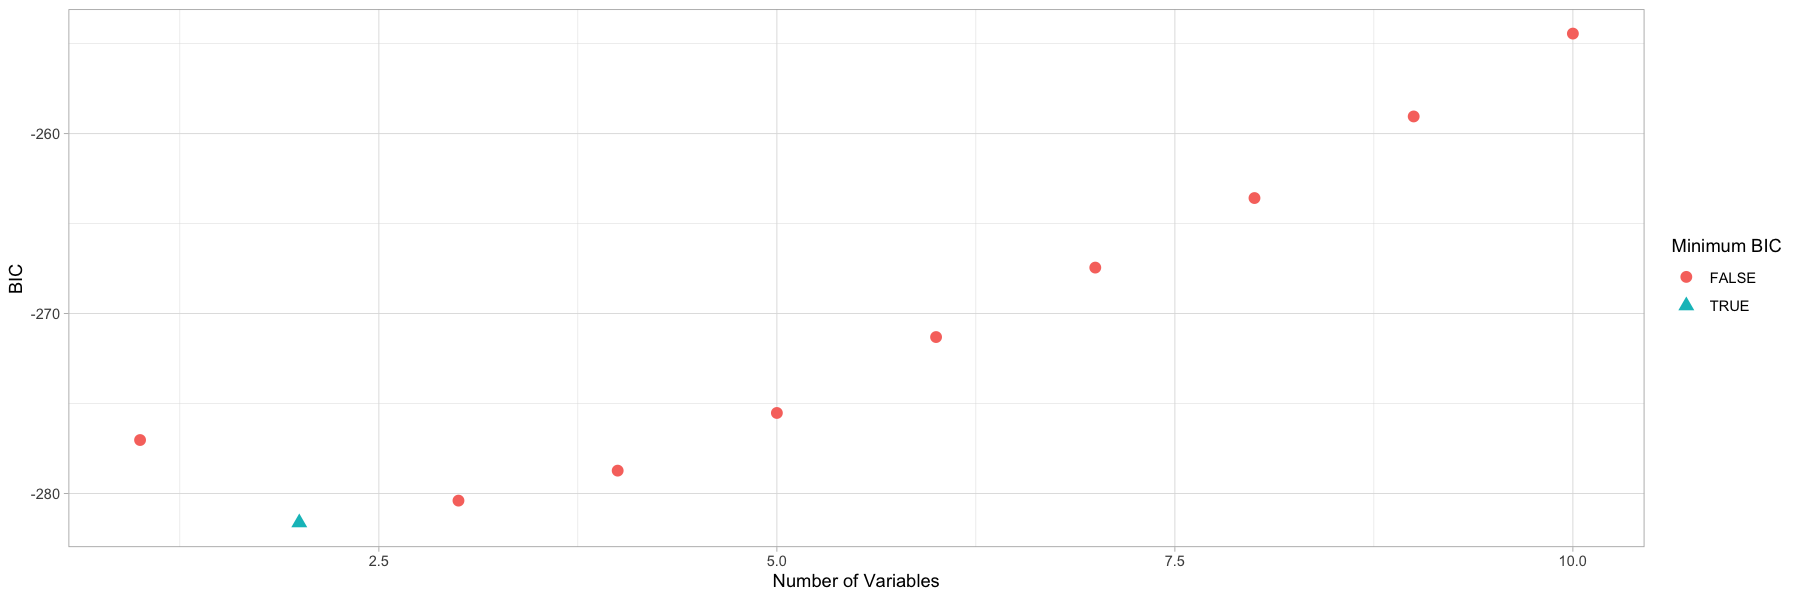

In [9]:
options(repr.plot.width=15, repr.plot.height=5)

# Uncomment the model fit measures you want to look at. 
numvar = 1:length(reg.summary$rss)
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.


#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

print(max(adjr2))
which.max(adjr2)
coef(regfit.full, which.max(adjr2))

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

print(min(cp))
which.min(cp)
coef(regfit.full, which.min(cp))

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(min(bic))
which.min(bic)
coef(regfit.full, which.min(bic))







Which is the best model? Report the coefficients of the best model.

Coefficients for the models were as follows:

AdjR2: (5, .95) showing the best adjusted r squared value of about .949 with 5 variables in the model.

Mallow's CP: (4, 2) showing the minimum value of about 2 with the 4 variable model.

BIC: (2, -282) BIC was lowest at - 282 with a 2 variable model.

There is no clear answer from these fit statistics, but in trying to maximize fit and reduce error I would likely be conservative and choose the 2 varaible model. The adjusted r squared for a 2 variable model is still pretty high at about .947, 2 variables gives us the lowest BIC value, and Mallow's CP is about 4 with 2 variable. With a 2 variable model we are not in danger of overfitting.



---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10, method = c("forward"))
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " "*" " " " " " " " " " "
3  ( 1 )  " " " " "*" "*" "*" " " " " " " " " " "
4  ( 1 )  " " " " "*" "*" "*" " " " " " " "*" " "
5  ( 1 )  " " "*" "*" "*" "*" " " " " " " "*" " "
6  ( 1 )  " " "*" "*" "*" "*" "*" " " " " "*" " "
7  ( 1 )  "*" "*" "*" "*" "*" "*" " " " " "*" " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "

[1] 10


[1] 5

(Intercept)           X2           X3           X4           X5           X9 
 4.708669361  0.216200075  1.447177710 -0.079817222 -0.114702337  0.001197915

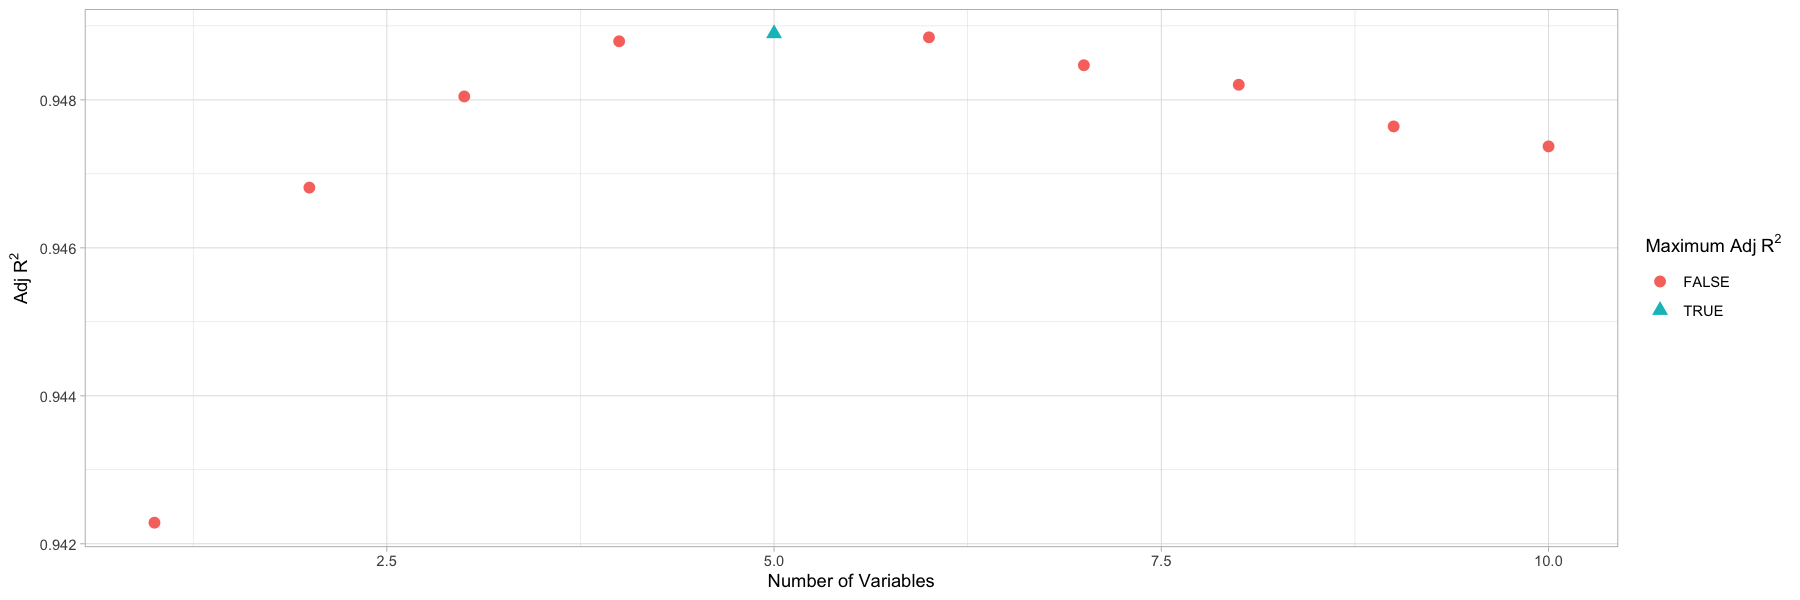

[1] 0


[1] 4

(Intercept)            X3            X4            X5            X9 
 4.8106604346  1.4131364020 -0.0368363521 -0.1006451587  0.0009346856

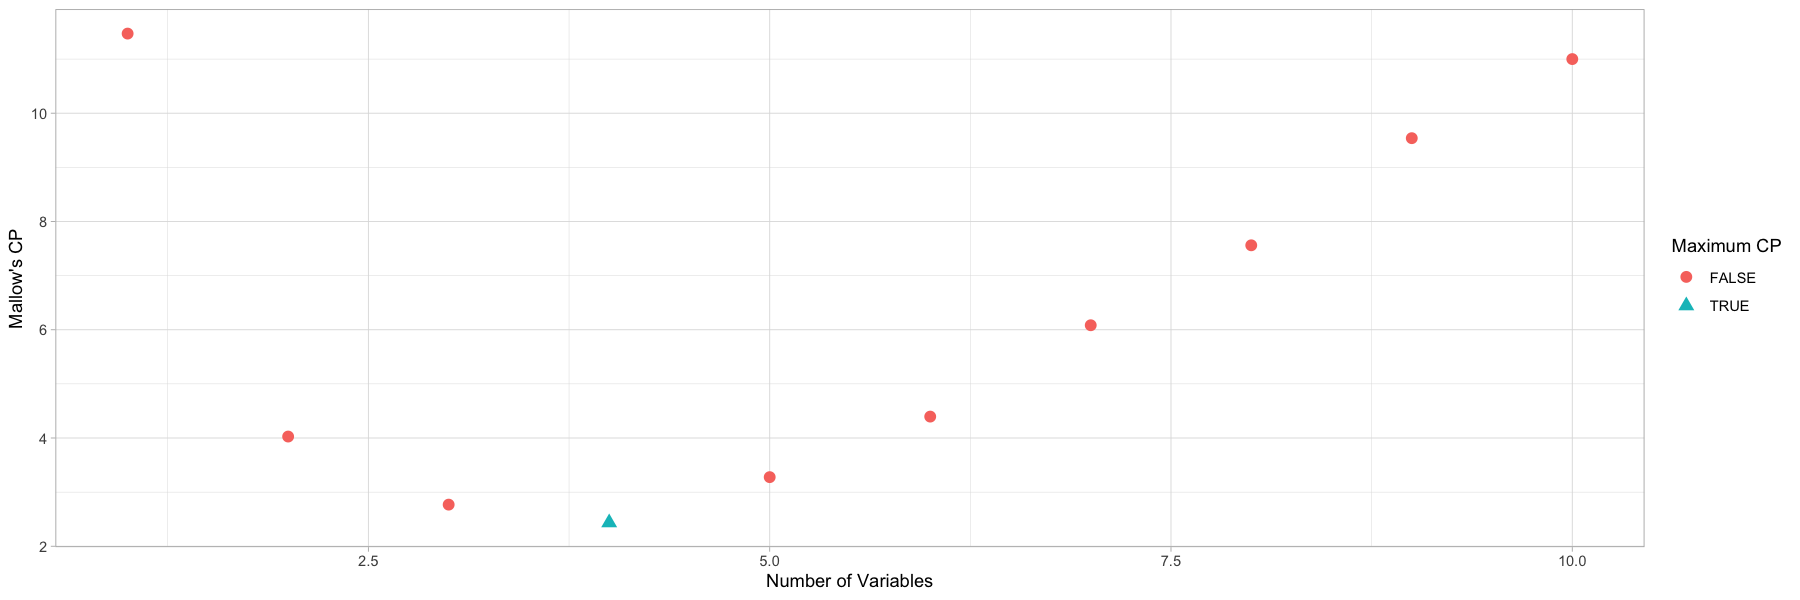

[1] -281.6221


[1] 2

(Intercept)          X3          X5 
 4.71862918  1.27606026 -0.04237361

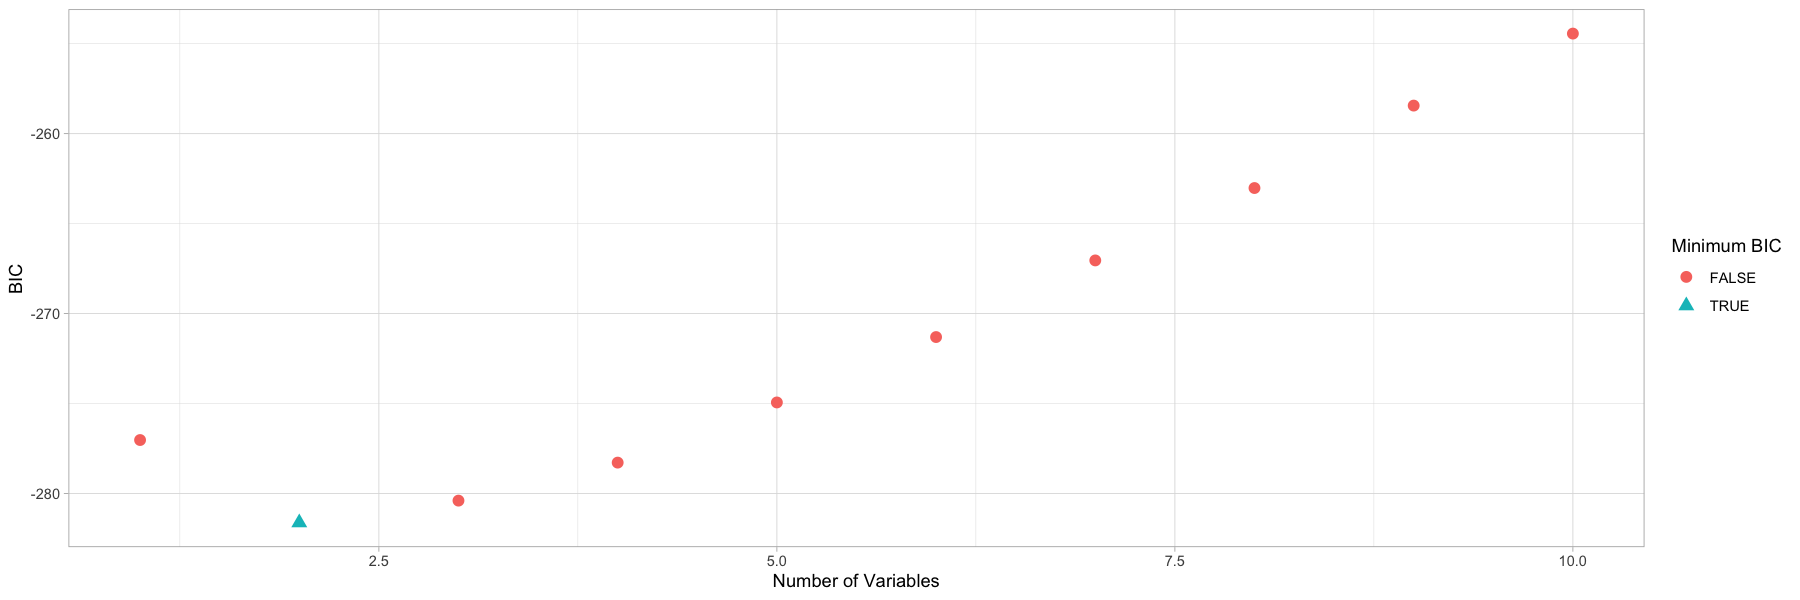

In [26]:
regfit.forward <- regsubsets(Y ~ ., df, nvmax = 10, method = c("forward"))
regfit.forward.summary <- summary(regfit.forward)
regfit.forward.summary

#adjr2
adjr2.df_for <- data.frame(numvar = numvar, adjr2 <- regfit.forward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df_for$maxadjr2[which.max(regfit.forward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_for,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

print(max(adjr2.df_for))
which.max(regfit.forward.summary$adjr2)
coef(regfit.forward, which.max(regfit.forward.summary$adjr2))


# #mallow's cp
cp.df_for <- data.frame(numvar = numvar, cp <- regfit.forward.summary$cp, mincp <- allfalse)
cp.df_for$mincp[which.min(regfit.forward.summary$cp)] <- TRUE
ggplot(cp.df_for,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

print(min(cp.df_for))
which.min(regfit.forward.summary$cp)
coef(regfit.forward, which.min(regfit.forward.summary$cp))

#bic
bic.df_for <- data.frame(numvar = numvar,bic <- regfit.forward.summary$bic, minbic <- allfalse)
bic.df_for$minbic[which.min(regfit.forward.summary$bic)] <- TRUE
ggplot(bic.df_for,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(min(bic.df_for))
which.min(regfit.forward.summary$bic)
coef(regfit.forward, which.min(regfit.forward.summary$bic))



In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10, method = c("backward"))
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " "*" " " " " " " " " " "
3  ( 1 )  " " " " "*" " " "*" "*" " " " " " " " "
4  ( 1 )  " " " " "*" " " "*" "*" " " "*" " " " "
5  ( 1 )  " " " " "*" "*" "*" "*" " " "*" " " " "
6  ( 1 )  " " " " "*" "*" "*" "*" " " "*" " " "*"
7  ( 1 )  " " " " "*" "*" "*" "*" "*" "*" " " "*"
8  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" " " "*"
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

[1] 10


[1] 5

(Intercept)          X3          X4          X5          X6          X8 
 4.73680615  1.31100292  0.19833816 -0.05577419 -0.09991279  0.01019443

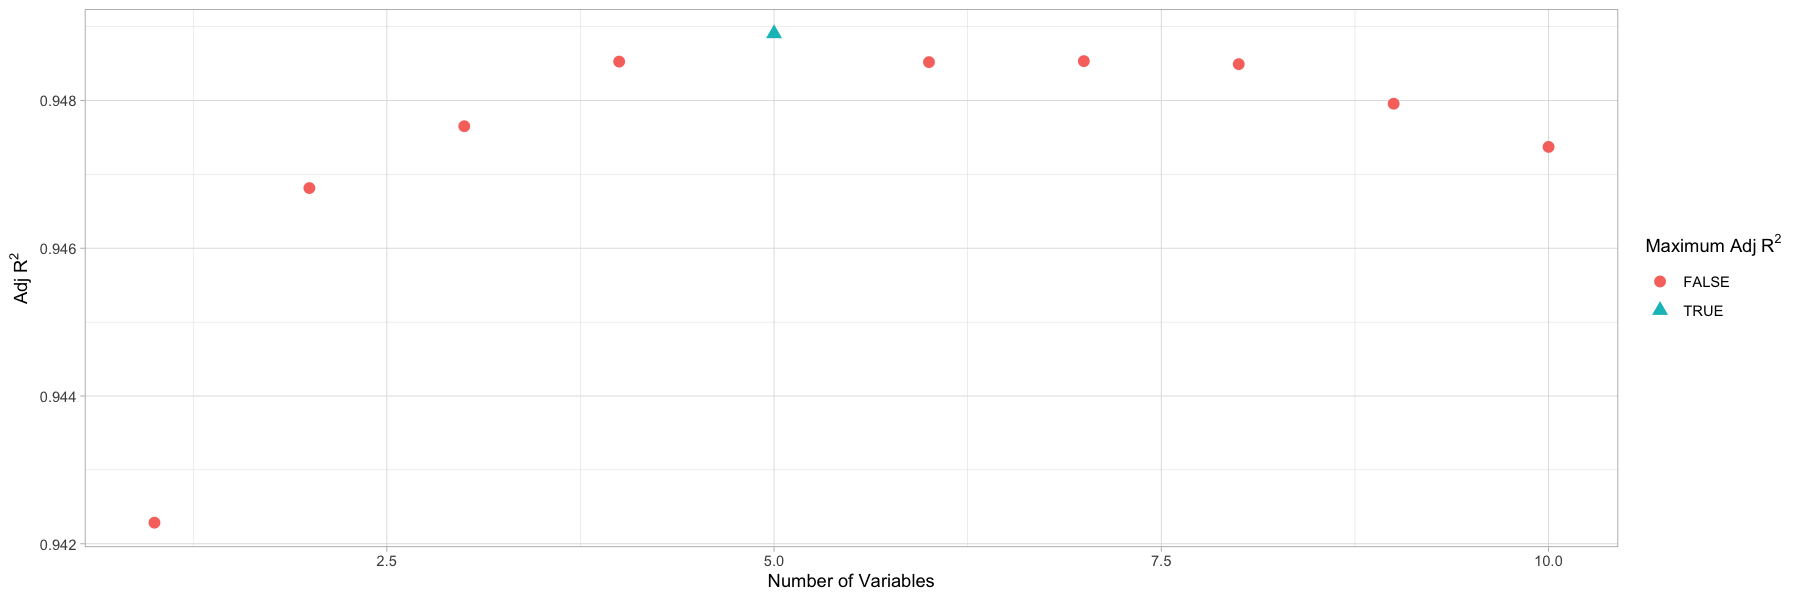

[1] 0


[1] 4

(Intercept)           X3           X5           X6           X8 
 4.814919347  1.269865047 -0.044775137 -0.023848838  0.003258814

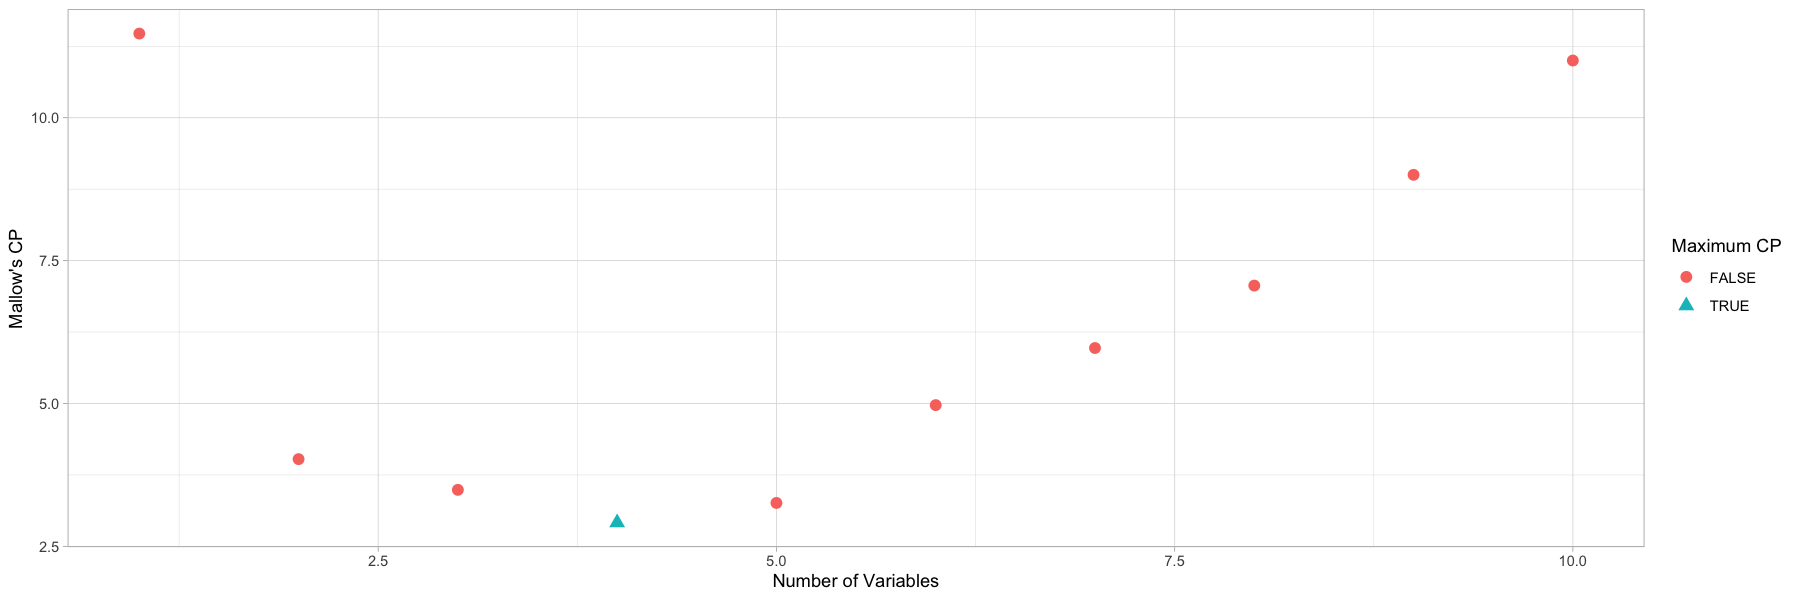

[1] -281.6221


[1] 2

(Intercept)          X3          X5 
 4.71862918  1.27606026 -0.04237361

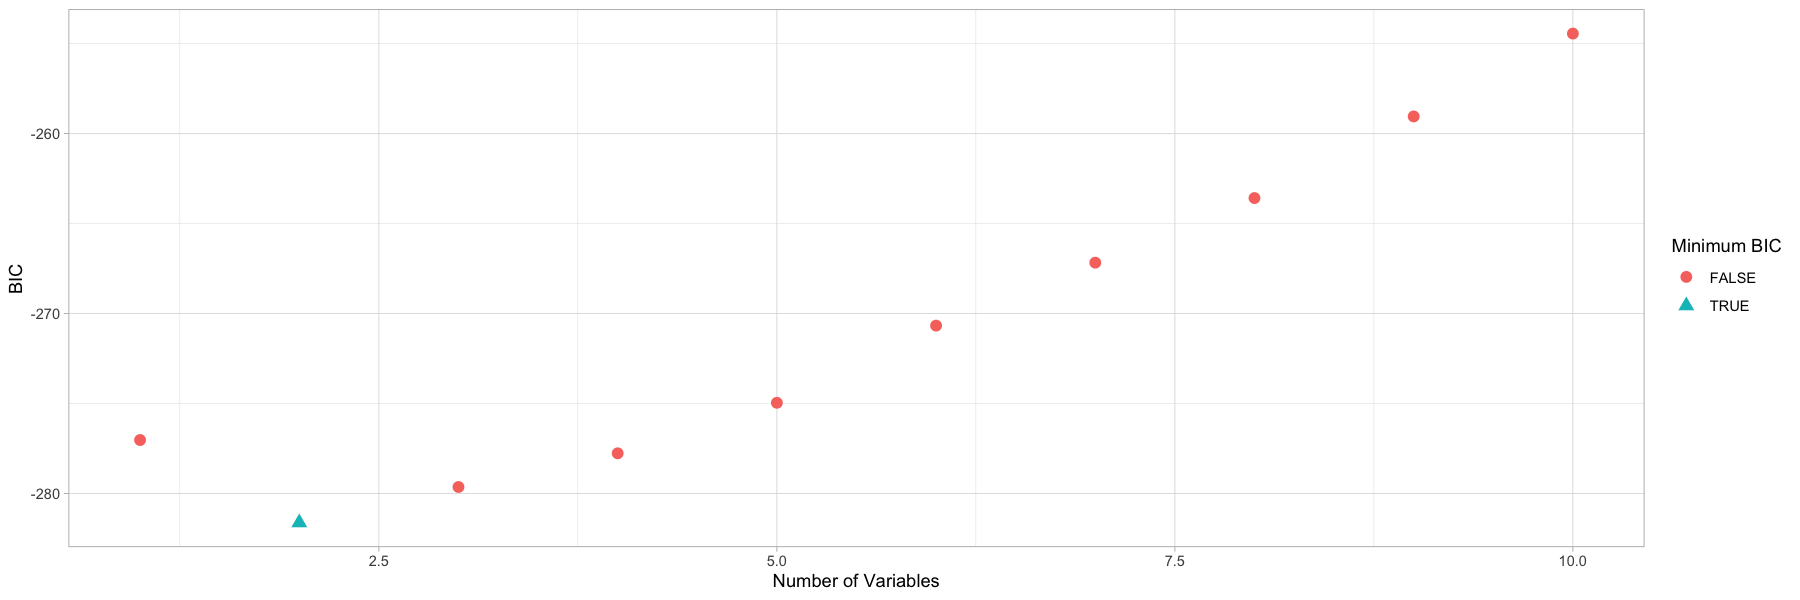

In [27]:
regfit.backward <- regsubsets(Y ~ ., df, nvmax = 10, method = c("backward"))
regfit.backward.summary <- summary(regfit.backward)
regfit.backward.summary

#adjr2
adjr2.df_back <- data.frame(numvar = numvar, adjr2 <- regfit.backward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df_back$maxadjr2[which.max(regfit.backward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_back,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

print(max(adjr2.df_back))
which.max(regfit.backward.summary$adjr2)
coef(regfit.backward, which.max(regfit.backward.summary$adjr2))


# #mallow's cp
cp.df_back <- data.frame(numvar = numvar, cp <- regfit.backward.summary$cp, mincp <- allfalse)
cp.df_back$mincp[which.min(regfit.backward.summary$cp)] <- TRUE
ggplot(cp.df_back,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

print(min(cp.df_back))
which.min(regfit.backward.summary$cp)
coef(regfit.backward, which.min(regfit.backward.summary$cp))

#bic
bic.df_back <- data.frame(numvar = numvar,bic <- regfit.backward.summary$bic, minbic <- allfalse)
bic.df_back$minbic[which.min(regfit.backward.summary$bic)] <- TRUE
ggplot(bic.df_back,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
geom_point(size=3) + theme_light() + 
labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

print(min(bic.df_back))
which.min(regfit.backward.summary$bic)
coef(regfit.backward, which.min(regfit.backward.summary$bic))


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

The results from parts a and b are nearly the same as the results from question 1. There are slight variations in coefficients to the tenths or hundredths place, but essentially the outputs are the same. 

BIC: (2, -281)
Mallow's CP: (4, 2.6)
AdjR2: (5, .95)

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [28]:
set.seed(3)
n <- 1000
p <- 20
xnames <- paste0("X", 1:p)
# setting 10 betas to 0 and the others are random between 1 and 10
betas <- c(runif(10, 1, 10), rep(0, 10)) %>% round(2) %>% sample 
epsilon <- rnorm(n, 0 , .1)
yformula <- paste0(betas, "*", xnames) %>% paste0(., collapse = "+")
trainrows <- sample(n, 100)

# Initialize df and create random X variables
q3dat <- matrix(nrow = n, ncol = p, dimnames = list(1:n, xnames)) %>% 
  as.data.frame() %>% 
  mutate(across(everything(), ~rnorm(n))) %>% 
  mutate(Y=eval(parse(text = yformula))+ epsilon)

train <- q3dat[trainrows,]
test <- q3dat[-trainrows,]


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

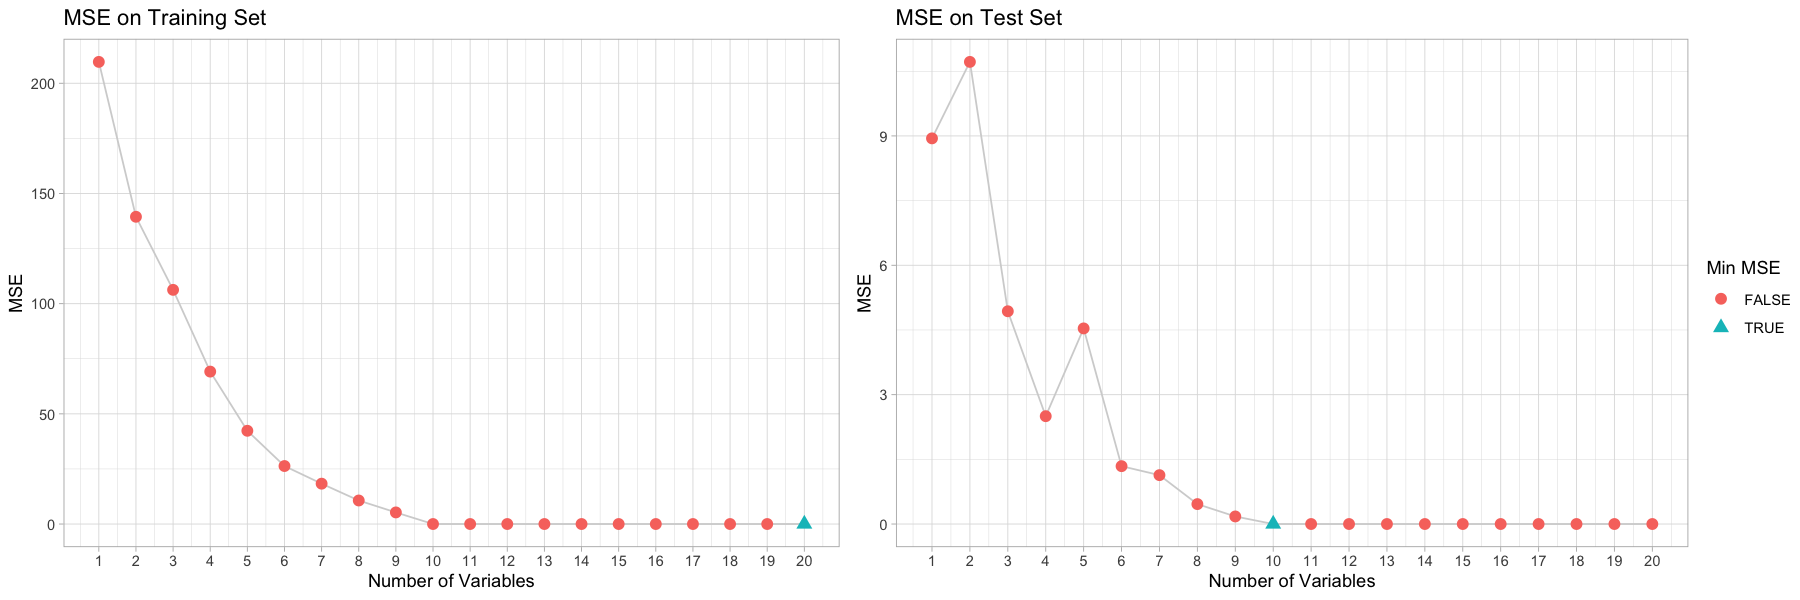

In [30]:
options(repr.plot.width=15, repr.plot.height=5)

train.subsets <- regsubsets(Y~.,train,nvmax = 20)
train.summary <- train.subsets %>% summary

# Plot the training MSE
tibble(MSE = train.summary$rss/100) %>% 
  mutate(id = row_number(), min = if_else(id == which.min(train.summary$rss), TRUE, FALSE)) %>% 
  ggplot(aes(id, MSE)) + 
  geom_line(col = "lightgray") +
  geom_point(aes(col = min, shape = min), size = 3) + 
  labs(title = "MSE on Training Set", x = "Number of Variables",
       color = "Min MSE", shape = "Min MSE") +
  theme_light() +
  scale_x_continuous(breaks = 1:20) -> p.train

# Calculate test MSE
test_errors <- rep(NA, 20)
test.matrix <- model.matrix(Y ~ ., data = test)

for (i in 1:p) {
  coeffs <- coef(train.subsets, id = i)
  pred <- test.matrix[,names(coeffs)]%*%coeffs
  test_errors[i] <- mean(test$Y-pred)^2
}

# Plot test MSE
tibble(MSE = test_errors) %>%
  mutate(id = row_number(), min = if_else(id == which.min(test_errors), TRUE, FALSE)) %>% 
  ggplot(aes(id, MSE)) + 
  geom_line(col = "lightgray") +
  geom_point(aes(col = min, shape = min), size = 3) + 
  labs(title = "MSE on Test Set", x = "Number of Variables",
       color = "Min MSE", shape = "Min MSE") +
  theme_light() +
  scale_x_continuous(breaks = 1:20) -> p.test

ggarrange(p.train, p.test, common.legend = TRUE, legend = "right")


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [31]:
# Compare best model to actual model
best.coefs <- coef(train.subsets, id = 10)[-1] %>% round(2)

tibble(
  Predictor = names(best.coefs),
  BestModel = as.numeric(best.coefs),
  Actual = betas[which(!betas %in% 0)],
  Difference = BestModel - Actual
)


Predictor,BestModel,Actual,Difference
<chr>,<dbl>,<dbl>,<dbl>
X2,6.69,6.68,0.01
X3,3.67,3.65,0.02
X7,6.42,6.42,0.00
X8,8.28,8.27,0.01
X13,2.51,2.51,0.00
X15,6.46,6.44,0.02
X17,3.97,3.95,0.02
X18,2.13,2.12,0.01
X19,6.22,6.20,0.02


Identify the best model according the test MSE: The lowest test MSE was at 10 variables.
How does this model compare to the actual model used to simulate the dataset?
When looking at the table that Avital helped me create, this model is very similar to the actual model used to simulate the dataset. The differences between the best and actual models are less than or equal to .02. 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Ketura, Avital- the queen of functions and all things R